In [2]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

In [3]:
#folder = '/home/utente/Documents/Optim/mpc-dock-default2/safe-mpc/datauniform/2024-07-27_15-43-42PARTIAL_CONDENSING_HPIPM100800parallelnewx0'
#folder = '/home/utente/Documents/Optim/mpc-dock-default2/safe-mpc/data/2024-07-27_15-27-16PARTIAL_CONDENSING_HPIPM100800regedingnewx0'
#folder = '/home/utente/Documents/Optim/mpc-dock-default2/safe-mpc/data/2024-07-29_10-21-42PARTIAL_CONDENSING_HPIPM100800'
folder= '/home/utente/Documents/Optim/DATI/Datix0new/parallelcheckintegrate'
folder= '/home/utente/Documents/Optim/DATI/Datix0new/ParallelCheckIntNegativeJmp-5'
folder= '/home/utente/Documents/Optim/DATI/DatiGuessCorrection/81ParallelJmp-1Correction6'
data = {}
for i in os.listdir(folder):
    if i[-4:]=='.pkl':
        with open(folder+'/'+i,'rb') as f:
            data[i[:-4]] = pickle.load(f)

In [4]:
folder2= '/home/utente/Documents/Optim/DATI/Datix0new/recedingNegativeJmp-21'
folder2= '/home/utente/Documents/Optim/DATI/DatiGuessCorrection/recedingJmp-5CorrectionAlways'
data2 = {}
for i in os.listdir(folder2):
    if i[-4:]=='.pkl':
        with open(folder2+'/'+i,'rb') as f:
            data2[i[:-4]] = pickle.load(f)

In [6]:
os.listdir(folder)
with open(folder+'/coreused.pkl','rb') as f:
    ata = pickle.load(f)


In [7]:
data.keys()

dict_keys(['errors', 'safehor_hist', 'parallel_x0succes', 'x_u', 'coreused', 'parallel_results', 'error_jump', 'jumps'])

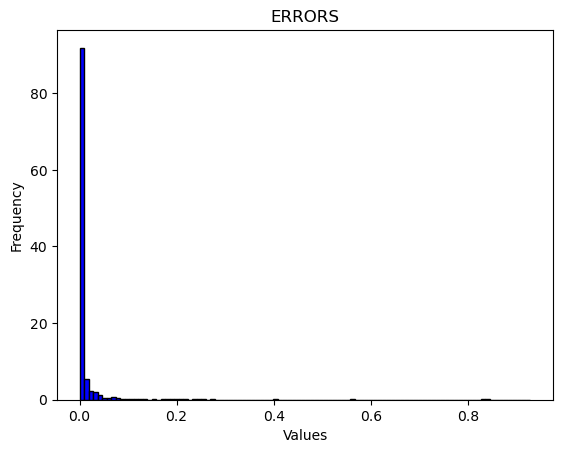

0.9284492650267958

In [8]:
err = [item for sublist in data['errors'] for item in sublist]
err=np.array(err).flatten()
err=err[~np.isnan(err)]
err = err[err > 1e-4]

plt.hist(err,density=True, bins=100, color='blue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('ERRORS')
 
# Display the plot
plt.show()

np.max(err)

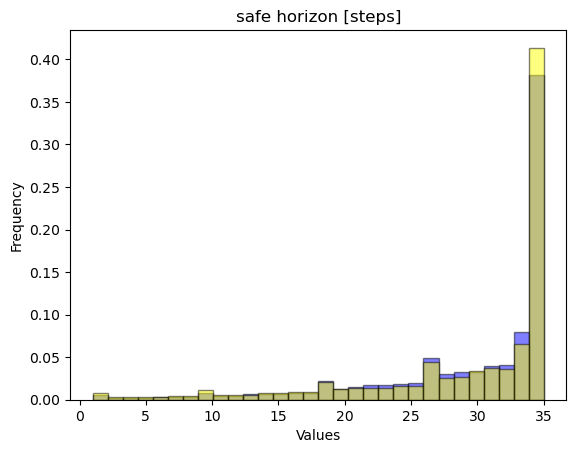

In [9]:
horizon_safe = []
for i in range(len(data['safehor_hist'])):
    for j in range(len(data['safehor_hist'][i])):
        horizon_safe.append(data['safehor_hist'][i][j])
horizon_safe=np.array(horizon_safe)

horizon_safe_rec =[]
for i in range(len(data2['safehor_hist'])):
    for j in range(len(data2['safehor_hist'][i])):
        horizon_safe_rec.append(data2['safehor_hist'][i][j])
horizon_safe_rec=np.array(horizon_safe_rec)


plt.hist(horizon_safe[horizon_safe<36],density=True, bins=30,color='blue', alpha=.5, edgecolor='black')
plt.hist(horizon_safe_rec[horizon_safe_rec<36],density=True, bins=30,color='yellow' ,alpha=.5,edgecolor='black')

 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('safe horizon [steps]')
 
# Display the plot
plt.show()


In [10]:
print(np.mean(horizon_safe_rec))
print(np.mean(horizon_safe))

28.970018281535648
29.14267044216946


In [8]:
data['x_u']['x_sim'][0][-1]
def convergenceCriteria(x, mask=None):
    if mask is None:
        mask = np.array([1,0,0,1,0,0])
    return np.linalg.norm(np.multiply(mask, x - np.array([3.876991,0,0,0,0,0]))) < 1e-3 

In [9]:
succes_par, succes_rec = [],[]
failed_par,failed_rec = [], []
for i in range(len(data['x_u']['x_sim'])):
    if convergenceCriteria(data['x_u']['x_sim'][i][-1]):
        succes_par.append(i)
    else:
        failed_par.append(i)
    if convergenceCriteria(data2['x_u']['x_sim'][i][-1]):
        succes_rec.append(i)
    else:
        failed_rec.append(i)


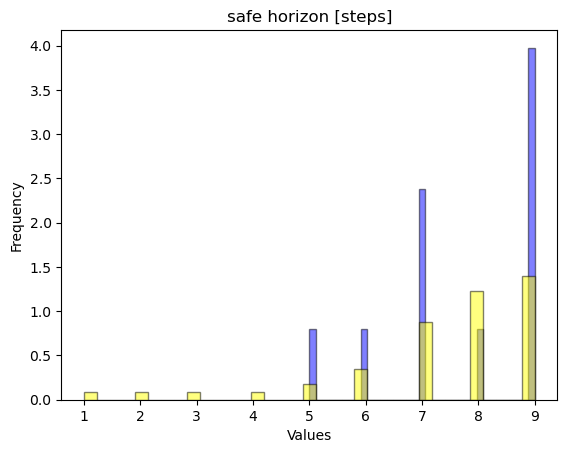

In [14]:
horizon_safe = []
for i in succes_par:
    for j in range(len(data['safehor_hist'][i])):
        horizon_safe.append(data['safehor_hist'][i][j])
horizon_safe=np.array(horizon_safe)

horizon_safe_rec =[]
for i in succes_rec:
    for j in range(len(data2['safehor_hist'][i])):
        horizon_safe_rec.append(data2['safehor_hist'][i][j])
horizon_safe_rec=np.array(horizon_safe_rec)


plt.hist(horizon_safe[horizon_safe<10],density=True, bins=35,color='blue', alpha=.5, edgecolor='black')
plt.hist(horizon_safe_rec[horizon_safe_rec<10],density=True, bins=35,color='yellow' ,alpha=.5,edgecolor='black')

 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('safe horizon [steps]')
 
# Display the plot
plt.show()

In [18]:
print(np.mean(horizon_safe_rec))
print(np.mean(horizon_safe))

31.03308294709925
31.051957001102537


In [11]:
common_solved = list(set(succes_par) & set(succes_rec))
common_failed = list(set(failed_par) & set(failed_rec))

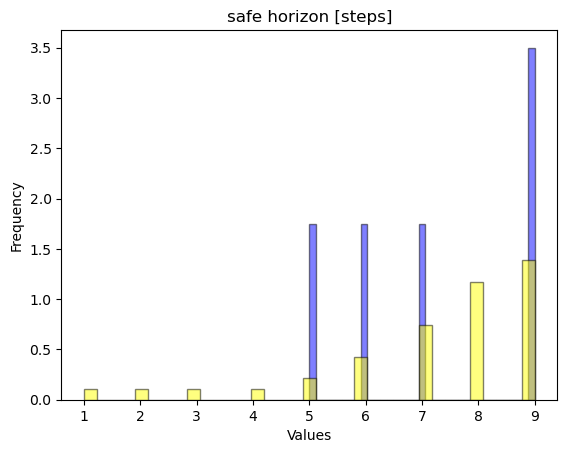

31.161099512874042
31.37640258415505


In [13]:
horizon_safe = []
for i in common_solved:
    for j in range(len(data['safehor_hist'][i])):
        horizon_safe.append(data['safehor_hist'][i][j])
horizon_safe=np.array(horizon_safe)

horizon_safe_rec =[]
for i in common_solved:
    for j in range(len(data2['safehor_hist'][i])):
        horizon_safe_rec.append(data2['safehor_hist'][i][j])
horizon_safe_rec=np.array(horizon_safe_rec)


plt.hist(horizon_safe[horizon_safe<10],density=True,color='blue',bins=35,alpha=.5, edgecolor='black')
plt.hist(horizon_safe_rec[horizon_safe_rec<10],density=True, color='yellow' ,bins=35,alpha=.5,edgecolor='black')

 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('safe horizon [steps]')
 
# Display the plot
plt.show()

print(np.mean(horizon_safe_rec))
print(np.mean(horizon_safe))

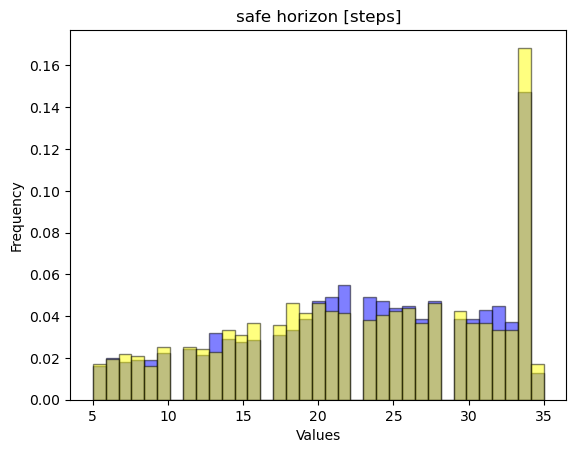

In [29]:
horizon_safe = []
for i in common_failed:
    for j in range(len(data['safehor_hist'][i])):
        horizon_safe.append(data['safehor_hist'][i][j])
horizon_safe=np.array(horizon_safe)

horizon_safe_rec =[]
for i in common_failed:
    for j in range(len(data2['safehor_hist'][i])):
        horizon_safe_rec.append(data2['safehor_hist'][i][j])
horizon_safe_rec=np.array(horizon_safe_rec)


plt.hist(horizon_safe[horizon_safe>4],density=True,color='blue',bins=35,alpha=.5, edgecolor='black')
plt.hist(horizon_safe_rec[horizon_safe_rec>4],density=True, color='yellow' ,bins=35,alpha=.5,edgecolor='black')

 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('safe horizon [steps]')
 
# Display the plot
plt.show()

In [22]:
min(horizon_safe_rec)

1

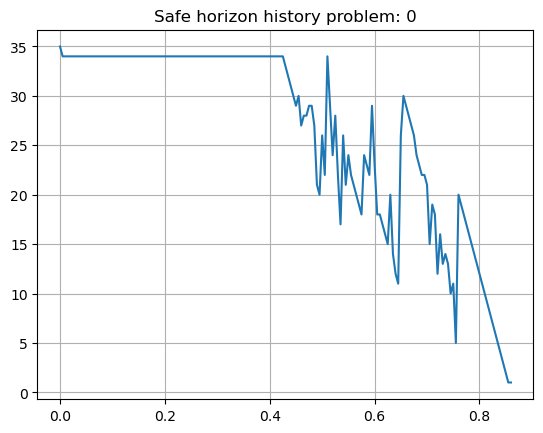

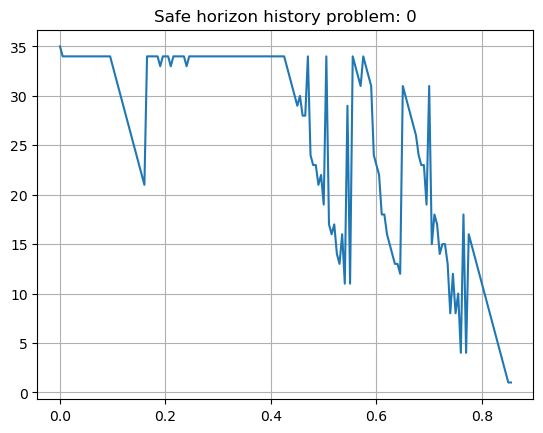

In [25]:
n=0
plotted=data['safehor_hist'][n]

plt.figure()
plt.title(f'Safe horizon history problem: {n}')
plt.grid(True)
plt.plot(np.arange(0,len(plotted))*5e-3,plotted)
plt.show()
plt.close()

plotted=data2['safehor_hist'][n]

plt.figure()
plt.title(f'Safe horizon history problem: {n}')
plt.grid(True)
plt.plot(np.arange(0,len(plotted))*5e-3,plotted)
plt.show()
plt.close()

In [27]:
for i in range(len(data['safehor_hist'])):
    minimumhor = min(data['safehor_hist'][i])
    if minimumhor<10:
        print(f'problem {i} minimum {minimumhor}')

problem 0 minimum 5
problem 1 minimum 1
problem 2 minimum 1
problem 4 minimum 1
problem 5 minimum 1
problem 7 minimum 1
problem 8 minimum 9
problem 9 minimum 1
problem 10 minimum 1
problem 11 minimum 1
problem 12 minimum 7
problem 13 minimum 9
problem 14 minimum 1
problem 16 minimum 1
problem 17 minimum 1
problem 19 minimum 1
problem 20 minimum 1
problem 21 minimum 1
problem 22 minimum 1
problem 23 minimum 1
problem 27 minimum 1
problem 28 minimum 9
problem 29 minimum 1
problem 37 minimum 1


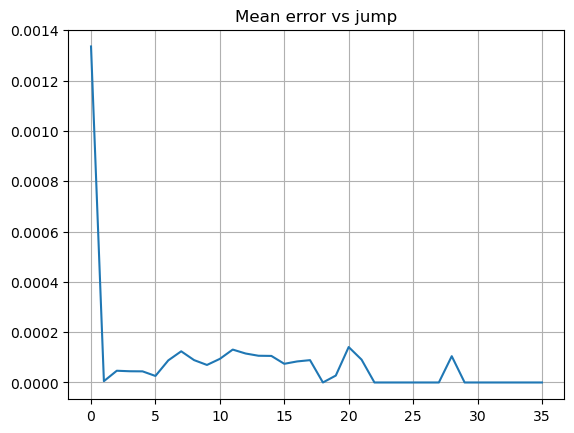

In [86]:
mean_error_jump  = [sublist if sublist else [0] for sublist in data['error_jump']]
for i in range(len(mean_error_jump)):
   a = np.array(mean_error_jump[i])
   a = a[~np.isnan(a)]
   mean_error_jump[i] = np.mean(a)


plt.figure()
plt.title('Mean error vs jump')
plt.grid(True)
plt.plot(mean_error_jump)
plt.show()
plt.close()

In [49]:
int(-1)
for i in range(-1):
    print(i)

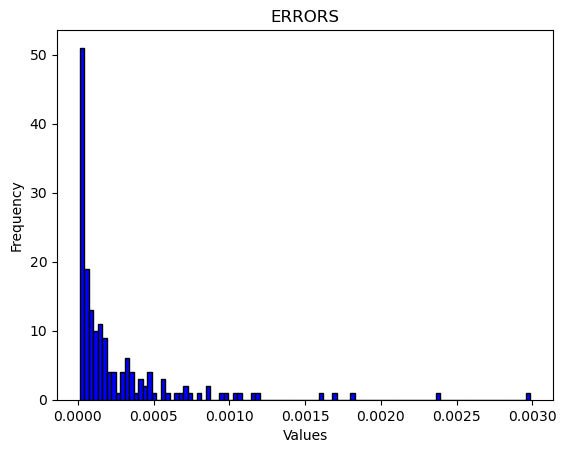

In [82]:
n_jump=2
err_jump=np.array(data['error_jump'][n_jump]).flatten()
err_jump=err_jump[~np.isnan(err_jump)]
err_jump = err_jump[err_jump > 1e-5]

plt.hist(err_jump, bins=100, color='blue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('ERRORS')
 
# Display the plot
plt.show()


# più errori perchè più step affrontati

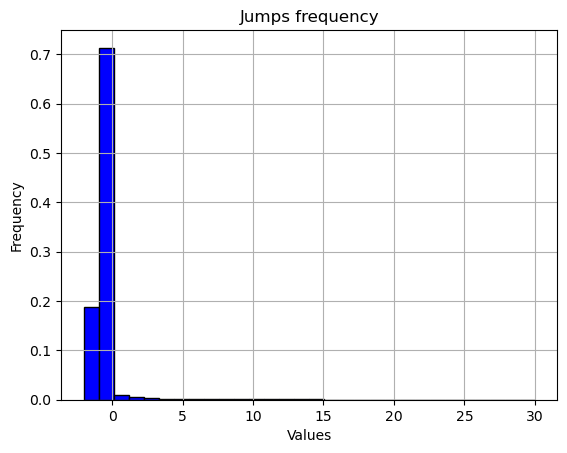

-0.008970727101038715

In [106]:
jumps = np.array(data['jumps']) 
#jumps=jumps[jumps>0]
plt.hist(jumps,density=True, bins=30,range=[-2, 30], color='blue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Jumps frequency')
plt.grid(True)
 
# Display the plot
plt.show()

max(jumps)
np.mean(jumps)

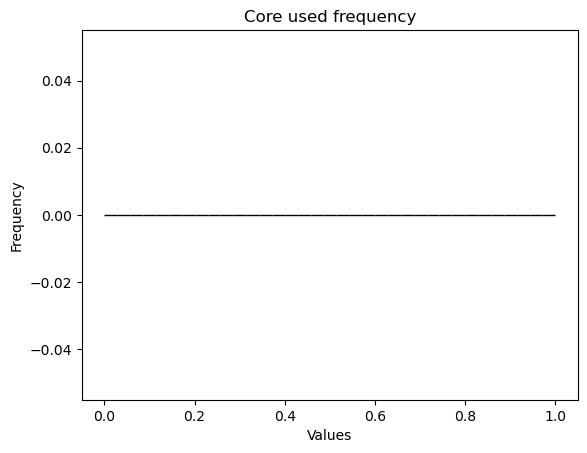

ValueError: min() arg is an empty sequence

In [63]:
core = np.array(data['coreused'])
plt.hist(core[core<=36], bins=35, color='blue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Core used frequency')
 
# Display the plot
plt.show()

min(core)

In [50]:
data['coreused']

[]

In [44]:
xu = data['x_u']
x0=[]
x=xu['x_sim']
tot=0
for i in range(len(x)):
    tot+=len(x[i])
    x0.append(x[i][0][0])
tot

12894

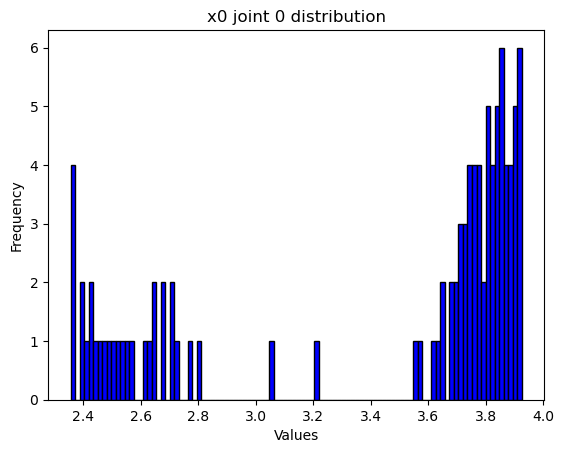

In [45]:
plt.hist(x0, bins=100, color='blue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('x0 joint 0 distribution')
 
# Display the plot
plt.show()

In [2]:
x0resampled=np.load('/home/utente/Documents/Optim/mpc-dock-default2/safe-mpc/data/x_init_2.npy')

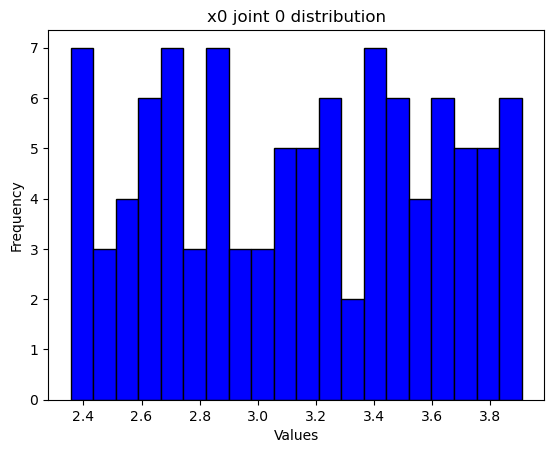

In [7]:
plt.hist(x0resampled[:,0], bins=20, color='blue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('x0 joint 0 distribution')
 
# Display the plot
plt.show()

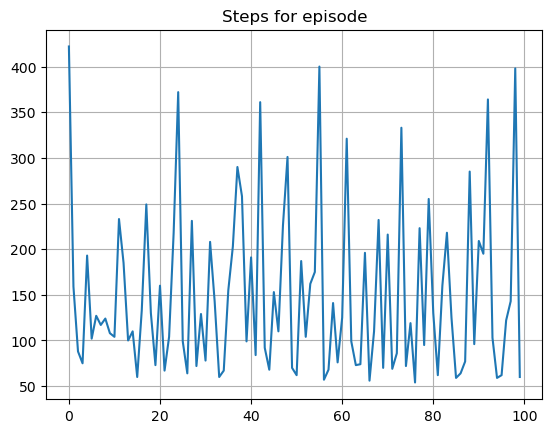

In [88]:
episode_len=[]
for i in range(len(data['safehor_hist'])):
    episode_len.append(len(data['safehor_hist'][i]))

plt.figure()
plt.title('Steps for episode')
plt.grid(True)
plt.plot(episode_len)
plt.show()
plt.close()

In [96]:
x = data['x_u']
u = data['x_u']

In [98]:
folder_name = os.getcwd()+'/plots29-07'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
folder_name

'/home/utente/Documents/Optim/mpc-dock-default2/safe-mpc/scripts/plots29-07'

In [103]:
nplot = 0
for i in range(0,100):    

    x_plt=np.array(x['x_sim'][nplot])
    u_plt=np.array(u['u_sim'][nplot])

    plt.figure(figsize=(10, 10))
    plt.title('HPIPM')
    plt.subplot(1, 2, 1)    
    plt.grid(True)
    plt.plot(np.arange(0,len(x_plt[:,0]))*5e-3,x_plt[:,0])
    plt.subplot(1, 2, 2)    
    plt.grid(True)
    plt.plot(np.arange(0,len(x_plt[:,3]))*5e-3,x_plt[:,3])
    plt.savefig(os.path.join(folder_name, str(nplot)+'hpipm'+'.png'))
    plt.close()


    plt.figure()
    plt.title('HPIPM u')
    plt.grid(True)
    plt.plot(np.arange(0,len(u_plt[:,0]))*5e-3,u_plt[:,0],label='u1')
    plt.plot(np.arange(0,len(u_plt[:,0]))*5e-3,u_plt[:,1],label='u2')
    plt.plot(np.arange(0,len(u_plt[:,0]))*5e-3,u_plt[:,2],label='u3')
    plt.legend()
    plt.savefig(os.path.join(folder_name, 'u'+str(nplot)+'hpipm'+'.png'))
    plt.close()

    nplot +=1

In [23]:
a=[1,2,3,4]
b=list.copy(a)

In [8]:
f = lambda x: x[0] ** 2 + x[1] ** 2
f([1,1])

2

In [6]:
Q = 2*np.diag([])
R = 2*np.diag([1e1, 1e1])

import scipy
scipy.linalg.block_diag(Q, R)

array([[20.,  0.],
       [ 0., 20.]])

In [1]:
a=[0,1,2,3,4,5,6,7,8,9,10]
a[5:]

[5, 6, 7, 8, 9, 10]

In [2]:
import numpy as np


In [12]:
np.linspace(0,0.175,int(0.175/0.005)+1)

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175])

In [5]:
import numpy as np
a=np.array([0,1,2])
if(a==a).all():
    pass

In [2]:
a=[0,1,2]

In [7]:
import numpy as np

In [152]:
def uniform_constraint(hor,cores,N):
    constrains = []
    step = (N-1)/cores
    if hor == 1 or hor == N:# or (hor-1)% step == 0:
        constrains = np.linspace(1,N,cores).round().astype(int).tolist()
    else:
        if hor < 1 + step:
            constrains = np.linspace(hor,N,cores).round().astype(int).tolist()
        elif hor >  N - step:
            constrains = np.linspace(1,hor,cores).round().astype(int).tolist()
        else:
            constrains=[] 
            constrains.append(hor)
            portion_h = (cores-1)*((N - hor)/(N-1))
            portion_h = int(portion_h) if portion_h-int(portion_h)<=0.5 else int(portion_h+1)
            portion_l = (cores-1)*((hor-1)/(N-1))
            portion_l = int(portion_l) if portion_l-int(portion_l)<=0.5 else int(portion_l+1)
            if portion_h == portion_l and cores%2==0 or portion_h +portion_l < cores -1:
                # print(portion_h)
                # print(portion_l)
                constrains = np.linspace(1,round(hor-step),portion_l).round().astype(int).tolist() + constrains \
                    + np.linspace(round(hor+step),N,portion_h+1).round().astype(int).tolist()
            else: 
                constrains = np.linspace(1,round(hor-step),portion_l).round().astype(int).tolist() + constrains \
                    + np.linspace(round(hor+step),N,portion_h).round().astype(int).tolist()
        if not(len(constrains)==cores):
            print(f'length = cores ? {len(constrains)==cores}')
            print(f'cores = {cores}, hor = {hor}')
            print(constrains)
        if len(constrains) != len(set(constrains)):
            print(f'repeated arguments ? {len(constrains) != len(set(constrains))}')
    return constrains

In [200]:
def uniform_constraint(hor,cores,N):
    constrains = []
    step = (N-1)/cores
    if hor == 1 or hor == N:# or (hor-1)% step == 0:
        constrains = np.linspace(1,N,cores).round().astype(int).tolist()
    else:
        if hor < 1 + step:
            constrains = np.linspace(hor,N,cores).round().astype(int).tolist()
        elif hor >  N - step:
            constrains = np.linspace(1,hor,cores).round().astype(int).tolist()
        else:
            constrains=[] 
            constrains.append(hor)
            portion_h = (cores-1)*((N - hor)/(N-1))
            portion_h = int(portion_h) if portion_h-int(portion_h)<=0.5 else int(portion_h+1)
            portion_l = (cores-1)*((hor-1)/(N-1))
            portion_l = int(portion_l) if portion_l-int(portion_l)<=0.5 else int(portion_l+1)
            # print(portion_h)
            # print(portion_l)
            if portion_h == portion_l and cores%2==0 or portion_h +portion_l < cores -1:
                
                constrains = np.linspace(int(max(1,round(hor-portion_l*step))),round(hor-step),portion_l).round().astype(int).tolist() + constrains \
                    + np.linspace(round(hor+step),N,portion_h+1).round().astype(int).tolist()
            else: 
                constrains_l = []
                constrains_h = []
                i,j=1,1
                while i < portion_l+1:
                    constrains_l.insert(0,int(max(1,round(hor - i*step))))
                    # print(round(hor - i*step))
                    i+=1
                while j < portion_h+1:
                    constrains_h.append(int(min(N,round(hor + j*step)))) 
                    j+=1
                constrains = constrains_l+constrains+constrains_h
        if not(len(constrains)==cores):
            print(f'length = cores ? {len(constrains)==cores}')
            print(f'cores = {cores}, hor = {hor}')
            print(constrains)
        if len(constrains) != len(set(constrains)):
            print(f'repeated arguments ? {len(constrains) != len(set(constrains))}')
    return constrains

In [1]:
import numpy as np

In [4]:
a= [0,2,3,1,-5]
a=np.argsort(a)[::-1]
a

array([2, 1, 3, 0, 4])

In [214]:
def uniform_constraint(hor,cores,N):
    constrains = []
    step = (N-1)/cores
    constrains=[] 
    constrains.append(hor)
    portion_h = (cores-1)*((N - hor)/(N-1))
    portion_h = int(portion_h) if portion_h-int(portion_h)<=0.5 else int(portion_h+1)
    portion_l = (cores-1)*((hor-1)/(N-1))
    portion_l = int(portion_l) if portion_l-int(portion_l)<=0.5 else int(portion_l+1)
    # print(portion_h)
    # print(portion_l)
    if portion_h == portion_l and cores%2==0 or portion_h +portion_l < cores -1:
        
        constrains = np.linspace(int(max(1,round(hor-portion_l*step))),round(hor-step),portion_l).round().astype(int).tolist() + constrains \
            + np.linspace(round(hor+step),N,portion_h+1).round().astype(int).tolist()
    else: 
        constrains_l = []
        constrains_h = []
        i,j=1,1
        while i < portion_l+1:
            constrains_l.insert(0,int(max(1,round(hor - i*step))))
            # print(round(hor - i*step))
            i+=1
        while j < portion_h+1:
            constrains_h.append(int(min(N,round(hor + j*step)))) 
            j+=1
        constrains = constrains_l+constrains+constrains_h
    if not(len(constrains)==cores):
        print(f'length = cores ? {len(constrains)==cores}')
        print(f'cores = {cores}, hor = {hor}')
        print(constrains)
    if len(constrains) != len(set(constrains)):
        print(f'repeated arguments ? {len(constrains) != len(set(constrains))}')
        print(hor)
        print(cores)
        print(constrains)
    return constrains

In [208]:
for i in range(1,36):
    for j in range(1,36):
        uniform_constraint(i,j,35)

repeated arguments ? True
1
35
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
repeated arguments ? True
2
35
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
repeated arguments ? True
3
35
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
repeated arguments ? True
4
35
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
repeated arguments ? True
5
35
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
repeated arguments ? True
6
35
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
repeated arguments ? T

In [215]:
for i in range(1,35):
    print(uniform_constraint(i,4,35))

[1, 10, 18, 26]
[2, 10, 19, 28]
[3, 12, 20, 28]
[4, 12, 21, 30]
[5, 14, 22, 30]
[6, 14, 23, 32]
[1, 7, 16, 24]
[1, 8, 16, 25]
[1, 9, 18, 26]
[2, 10, 18, 27]
[2, 11, 20, 28]
[4, 12, 20, 29]
[4, 13, 22, 30]
[6, 14, 22, 31]
[6, 15, 24, 32]
[8, 16, 24, 33]
[8, 17, 26, 34]
[10, 18, 26, 35]
[2, 10, 19, 28]
[3, 12, 20, 28]
[4, 12, 21, 30]
[5, 14, 22, 30]
[6, 14, 23, 32]
[7, 16, 24, 32]
[8, 16, 25, 34]
[9, 18, 26, 34]
[10, 18, 27, 35]
[11, 20, 28, 35]
[12, 20, 29, 35]
[4, 13, 22, 30]
[6, 14, 22, 31]
[6, 15, 24, 32]
[8, 16, 24, 33]
[8, 17, 26, 34]


In [212]:
uniform_constraint(5,35,35)

repeated arguments ? True
5
35
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34]

In [93]:
for i in range(1,36):
    print(uniform_constraint(i,4,35))

[1, 12, 24, 35]
[2, 13, 24, 35]
[3, 14, 24, 35]
[4, 14, 25, 35]
[5, 15, 25, 35]
[6, 16, 25, 35]
[7, 16, 26, 35]
[8, 17, 26, 35]
[9, 18, 26, 35]
[2, 10, 18, 27]
[2, 11, 20, 28]
[4, 12, 20, 29]
[4, 13, 22, 30]
[6, 14, 22, 31]
[6, 15, 24, 32]
[8, 16, 24, 33]
[8, 17, 26, 34]
[1, 18, 26, 35]
[2, 10, 19, 28]
[3, 12, 20, 28]
[4, 12, 21, 30]
[5, 14, 22, 30]
[6, 14, 23, 32]
[7, 16, 24, 32]
[8, 16, 25, 34]
[9, 18, 26, 34]
[1, 10, 18, 27]
[1, 10, 19, 28]
[1, 10, 20, 29]
[1, 11, 20, 30]
[1, 11, 21, 31]
[1, 11, 22, 32]
[1, 12, 22, 33]
[1, 12, 23, 34]
[1, 12, 24, 35]
